In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read Another CSV File with SWC data

In [2]:
df_raw = pd.read_csv('GE15Y_SWC.csv').drop(index=0)
df_raw.head()

,Date,Time,Rg,Ratm,Rn,T_soilref,Ta,RH,uref,LAI_total,...,zref,Rain,O3_concentration,Pesticid_concentration,Pest_soil,NH3_concentration,GammaLeaf_NH3,GammaSoil_NH3,R_litter_NH3,SWC
1,1/1/2012,0:00:00,NaN,NaN,0,NaN,11.9,93,4.9,NaN,...,NaN,0,26.986734,0,0,0,250,3000,0,0.250624
2,1/1/2012,1:00:00,NaN,NaN,0,NaN,11.7,95,4.3,NaN,...,NaN,0,21.272562,0,0,0,250,3000,0,0.250605
3,1/1/2012,2:00:00,NaN,NaN,0,NaN,11.8,94,3.7,NaN,...,NaN,0,14.972155,0,0,0,250,3000,0,0.250423
4,1/1/2012,3:00:00,NaN,NaN,0,NaN,11.7,96,3.5,NaN,...,NaN,0,16.864317,0,0,0,250,3000,0,0.250380
5,1/1/2012,4:00:00,NaN,NaN,0,NaN,11.8,95,4.2,NaN,...,NaN,0,24.66009,0,0,0,250,3000,0,0.250372


In [3]:
df_raw.shape

(8784, 25)

In [4]:
df_raw.columns

Index(['Date', 'Time', 'Rg', 'Ratm', 'Rn', 'T_soilref', 'Ta', 'RH', 'uref',
       'LAI_total', 'LAI_green', 'displacement_height', 'z0_soil', 'z0_canopy',
       'zh', 'zref', 'Rain', 'O3_concentration', 'Pesticid_concentration',
       'Pest_soil', 'NH3_concentration', 'GammaLeaf_NH3', 'GammaSoil_NH3',
       'R_litter_NH3', 'SWC'],
      dtype='object')

In [5]:
df_raw.isna().sum()

Date                         0
Time                         0
Rg                        8784
Ratm                      8784
Rn                         543
T_soilref                 4629
Ta                           0
RH                           0
uref                         0
LAI_total                 8784
LAI_green                 8784
displacement_height       8784
z0_soil                   8784
z0_canopy                 8784
zh                        8784
zref                      8784
Rain                         0
O3_concentration             0
Pesticid_concentration       0
Pest_soil                    0
NH3_concentration            0
GammaLeaf_NH3                0
GammaSoil_NH3                0
R_litter_NH3                 0
SWC                       1710
dtype: int64

In [6]:
df = df_raw.fillna(0)
df.head()

/var/folders/dq/43_5rtyn5lz1p4vkq89ykdw40000gn/T/ipykernel_19457/3933187300.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df_raw.fillna(0)


,Date,Time,Rg,Ratm,Rn,T_soilref,Ta,RH,uref,LAI_total,...,zref,Rain,O3_concentration,Pesticid_concentration,Pest_soil,NH3_concentration,GammaLeaf_NH3,GammaSoil_NH3,R_litter_NH3,SWC
1,1/1/2012,0:00:00,0,0,0,0,11.9,93,4.9,0,...,0,0,26.986734,0,0,0,250,3000,0,0.250624
2,1/1/2012,1:00:00,0,0,0,0,11.7,95,4.3,0,...,0,0,21.272562,0,0,0,250,3000,0,0.250605
3,1/1/2012,2:00:00,0,0,0,0,11.8,94,3.7,0,...,0,0,14.972155,0,0,0,250,3000,0,0.250423
4,1/1/2012,3:00:00,0,0,0,0,11.7,96,3.5,0,...,0,0,16.864317,0,0,0,250,3000,0,0.250380
5,1/1/2012,4:00:00,0,0,0,0,11.8,95,4.2,0,...,0,0,24.66009,0,0,0,250,3000,0,0.250372


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 1 to 8784
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    8784 non-null   object 
 1   Time                    8784 non-null   object 
 2   Rg                      8784 non-null   int64  
 3   Ratm                    8784 non-null   int64  
 4   Rn                      8784 non-null   object 
 5   T_soilref               8784 non-null   object 
 6   Ta                      8784 non-null   object 
 7   RH                      8784 non-null   object 
 8   uref                    8784 non-null   object 
 9   LAI_total               8784 non-null   int64  
 10  LAI_green               8784 non-null   int64  
 11  displacement_height     8784 non-null   int64  
 12  z0_soil                 8784 non-null   int64  
 13  z0_canopy               8784 non-null   int64  
 14  zh                      8784 non-null   

In [8]:
numeric_columns = ['Rain', 'Ta']
df[numeric_columns] = df[numeric_columns].apply(lambda col: pd.to_numeric(col, errors='ignore'))

/var/folders/dq/43_5rtyn5lz1p4vkq89ykdw40000gn/T/ipykernel_19457/1359480934.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[numeric_columns] = df[numeric_columns].apply(lambda col: pd.to_numeric(col, errors='ignore'))


In [9]:
df['datetime'] = pd.to_datetime(df['Date'] + " " + df['Time'])

In [10]:
df.groupby(df['datetime'].dt.date)['Rain'].mean().reset_index()

,datetime,Rain
0,2012-01-01,0.216667
1,2012-01-02,0.337500
2,2012-01-03,0.191667
3,2012-01-04,0.000000
4,2012-01-05,0.116667
...,...,...
361,2012-12-27,0.091667
362,2012-12-28,0.008333
363,2012-12-29,0.075000
364,2012-12-30,0.000000


In [11]:
daily_avg_precipitation = df.groupby(df['datetime'].dt.date)['Rain'].mean().reset_index()
daily_avg_precipitation['datetime'] = pd.to_datetime(daily_avg_precipitation['datetime'])
daily_avg_precipitation = daily_avg_precipitation.drop(columns='datetime')
daily_avg_precipitation

,Rain
0,0.216667
1,0.337500
2,0.191667
3,0.000000
4,0.116667
...,...
361,0.091667
362,0.008333
363,0.075000
364,0.000000


In [12]:
daily_avg_swc = df.groupby(df['datetime'].dt.date)['SWC'].mean().reset_index()
daily_avg_swc['datetime'] = pd.to_datetime(daily_avg_swc['datetime'])
daily_avg_swc = daily_avg_swc.drop(columns='datetime')
daily_avg_swc

,SWC
0,0.251090
1,0.252859
2,0.251850
3,0.250409
4,0.250370
...,...
361,0.288970
362,0.287483
363,0.287938
364,0.287611


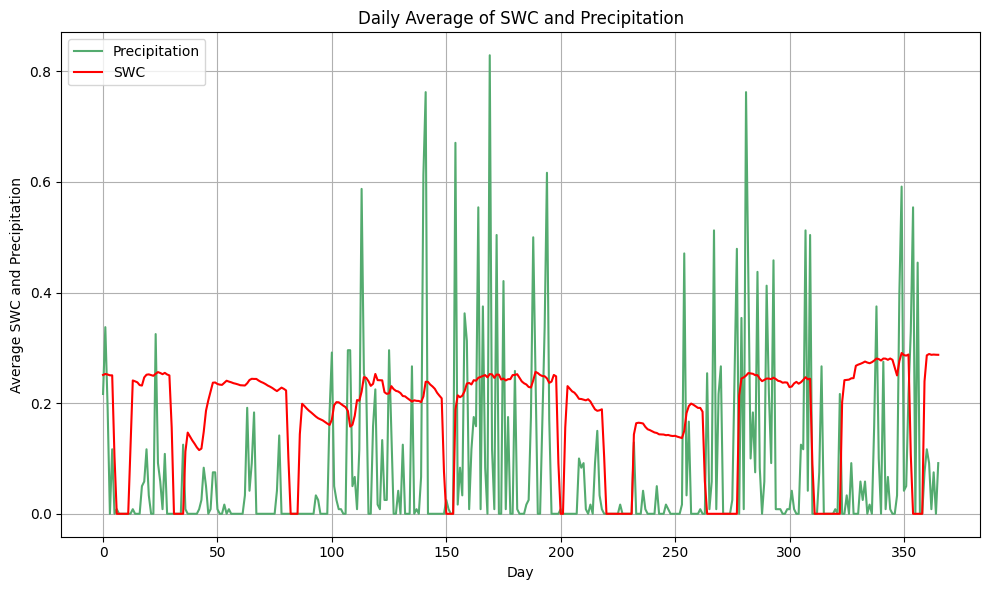

In [13]:
# Using matplotlib

plt.figure(figsize=(10, 6))
plt.plot(daily_avg_precipitation.index, daily_avg_precipitation, color='#54ab6f', label='Precipitation')
plt.plot(daily_avg_swc.index, daily_avg_swc, color='r', label='SWC') 
plt.title('Daily Average of SWC and Precipitation')  # Add a title
plt.xlabel('Day')  # Add X-axis label
plt.ylabel('Average SWC and Precipitation')  # Add Y-axis label
plt.grid(True)  # Add gridlines (optional)
# plt.xticks(rotation=45)  # Rotate X-axis labels for better readability (optional)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.legend(loc='upper left')  # Display the legend
plt.show()